# Class Assignment 4: Numerical Solution of 1D Diffusion Equation

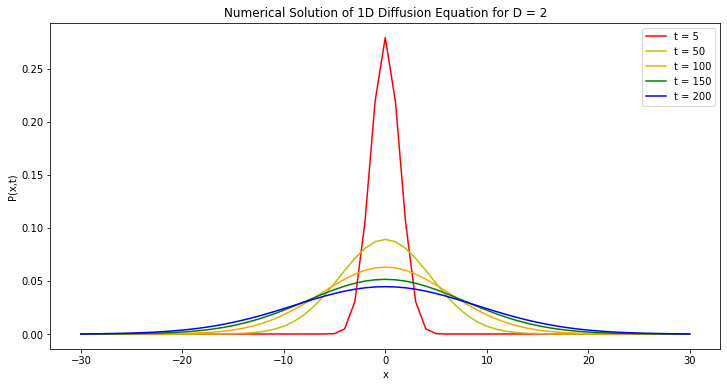

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

L = 30              # Size of the box
T = 200             # Time for which we compute
D = 2               # Diffusion Constant

L1,L2,L3,L4,L5 = [],[],[],[],[]     # For storing probability at different time stamps

dx = 1.0        # Initializing constants
dt = 0.1
F = D*dt/(dx**2)

u_1 = np.zeros(2*L+1,dtype='double')           # u at the previous time level
u_1[L] = 1                      # Set initial condition u(x,0) = 1

for n in range(1, T+1):
    u   = np.zeros(2*L+1,dtype='double')           # unknown u at new time level
    for j in range(1, 2*L):                        # Compute u from previous previous time level u
        u[j] = u_1[j] + F*(u_1[j+1] - 2*u_1[j] + u_1[j-1])

    u[0] = 0;  u[2*L] = 0           # Apply boundary conditions
    if (n == 5):
        L1 = u
    elif (n == 50):
        L2 = u
    elif (n == 100):
        L3 = u
    elif (n == 150):
        L4 = u
    elif (n == 200):
        L5 = u

    u_1[:]= u                       # Update u_1 to current u for the next time step

plt.figure(figsize=(12,6))
plt.plot(list(range(-L,L+1)),L1,'r',label='t = '+str(5))
plt.plot(list(range(-L,L+1)),L2,'y',label='t = '+str(50))
plt.plot(list(range(-L,L+1)),L3,'orange',label='t = '+str(100))
plt.plot(list(range(-L,L+1)),L4,'g',label='t = '+str(150))
plt.plot(list(range(-L,L+1)),L5,'b',label='t = '+str(200))
plt.xlabel('x')
plt.ylabel('P(x,t)')
plt.legend()
plt.title('Numerical Solution of 1D Diffusion Equation for D = '+str(D))
plt.show()

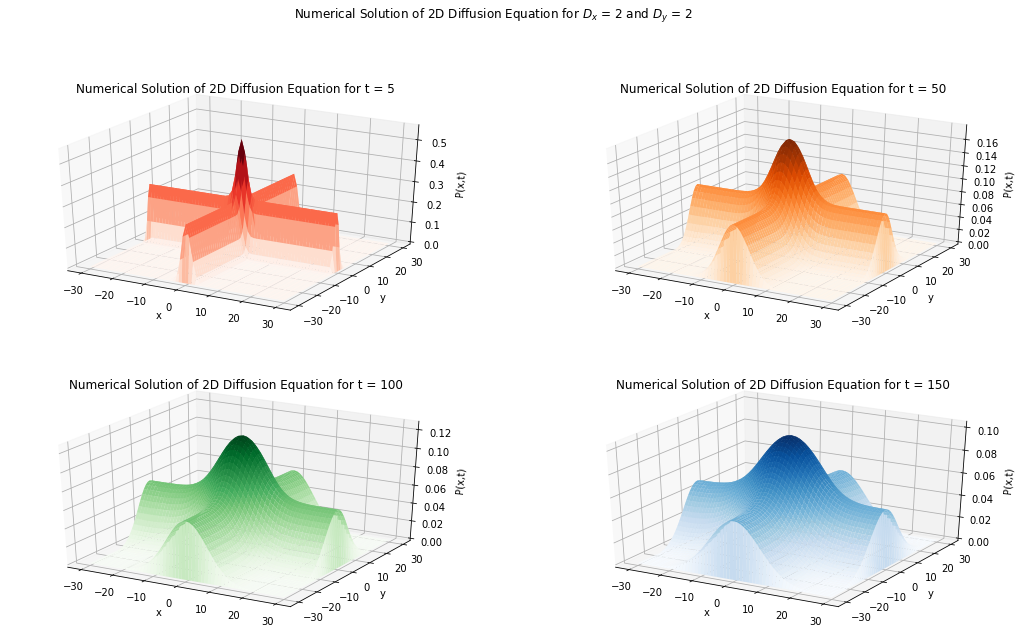

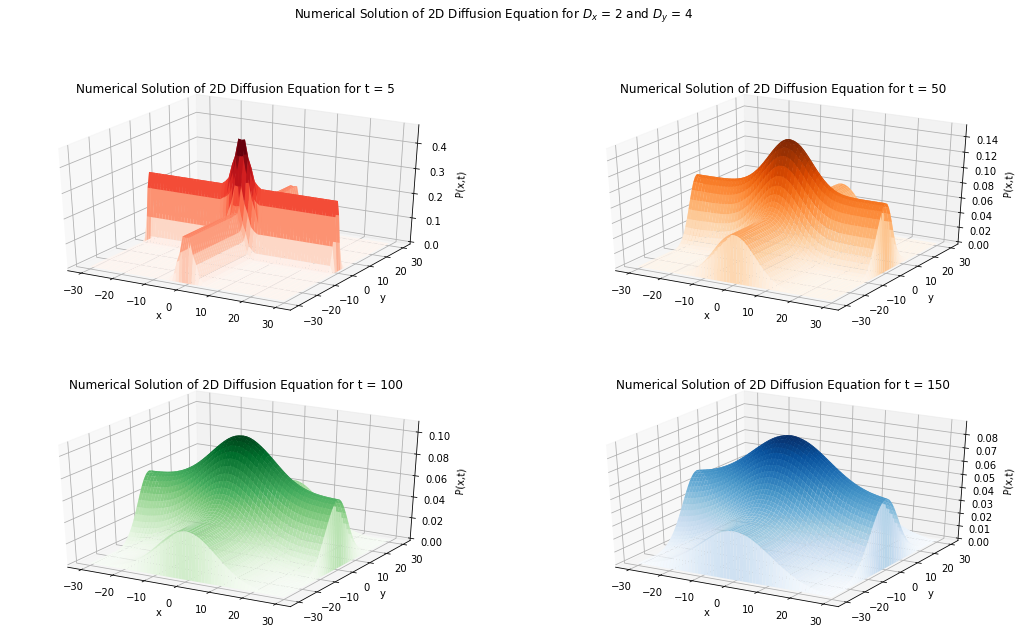

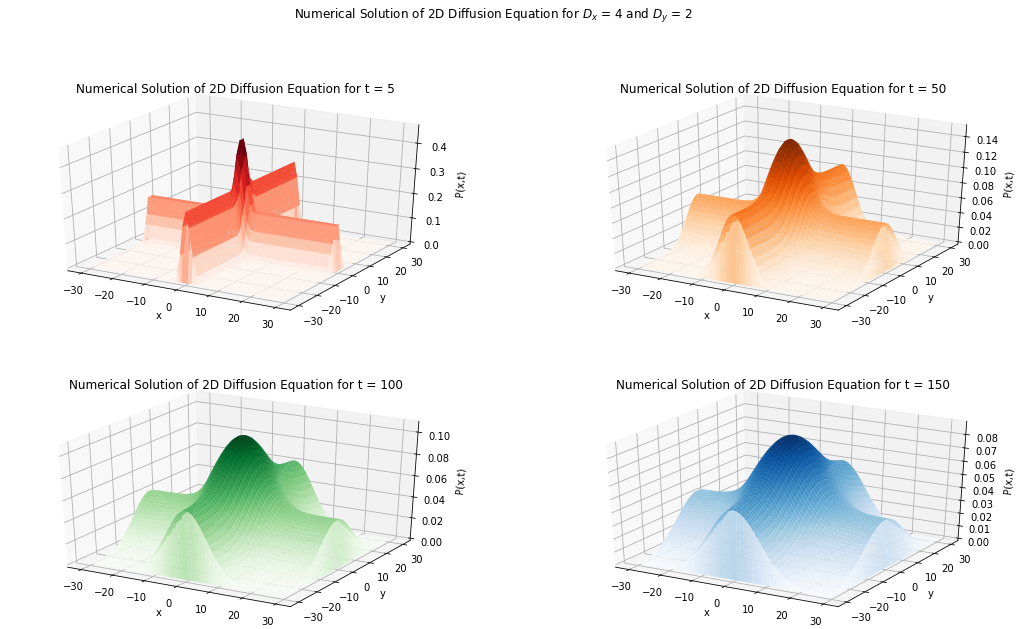

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


L = 30                      # Size of box
T = 200                     # Time for which we check
D_x = [2,4]                 # Diffusion constant in x for the 3 cases
D_y = [2,4]                 # Diffusion constant in y for the 3 cases
dx = 1.0                    # Intializing constant
dy = 1.0
dt = 0.1

for a in range(2):
    for b in range(2):
        if (a==1 and b==1):
            continue
        else:
            F_x = D_x[a]*dt/(dx**2)
            F_y = D_y[b]*dt/(dy**2)

            ux_1 = np.zeros(2*L+1,dtype='double')           # u at the previous time level
            uy_1 = np.zeros(2*L+1,dtype='double')           # for both x,y coordinates
            ux_1[L] = 1                                     # Set initial condition u(x,0) = 1
            uy_1[L] = 1

            X,Y = np.meshgrid(np.arange(-L,L+1),np.arange(-L,L+1))  # Set for plottin purpose
            fig = plt.figure(figsize=(18,10))
            u = np.zeros((T,2*L+1,2*L+1))               # Matrix for getting the x,y values together
            for n in range(1, T+1):
                ux   = np.zeros(2*L+1,dtype='double')           # unknown u at new time level
                uy   = np.zeros(2*L+1,dtype='double')
                for j in range(1, 2*L):                         # Compute u from previous previous time level u
                    ux[j] = ux_1[j] + F_x*(ux_1[j+1] - 2*ux_1[j] + ux_1[j-1])
                    uy[j] = uy_1[j] + F_y*(uy_1[j+1] - 2*uy_1[j] + uy_1[j-1])


                ux[0] = 0;  ux[2*L] = 0     # Apply boundary conditions
                uy[0] = 0;  uy[2*L] = 0
                
                for i in range(1,2*L):
                    for j in range(1,2*L):
                        u[n-1][i][j] += ux[i] + uy[j]
                
                if (n == 5):
                    ax = fig.add_subplot(2,2,1,projection='3d')
                    surf = ax.plot_surface(X,Y,u[4],cmap='Reds',rstride=1, cstride=1, antialiased=True)
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('P(x,t)')
                    ax.set_title('Numerical Solution of 2D Diffusion Equation for t = 5')
                elif (n == 50):
                    ax = fig.add_subplot(2,2,2,projection='3d')
                    ax.plot_surface(X,Y,u[49],cmap='Oranges',rstride=1, cstride=1, antialiased=True)
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('P(x,t)')
                    ax.set_title('Numerical Solution of 2D Diffusion Equation for t = 50') 
                elif (n == 100):
                    ax = fig.add_subplot(2,2,3,projection='3d')
                    ax.plot_surface(X,Y,u[99],cmap='Greens',rstride=1, cstride=1, antialiased=True)
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('P(x,t)')
                    ax.set_title('Numerical Solution of 2D Diffusion Equation for t = 100')
                elif (n == 150):
                    ax = fig.add_subplot(2,2,4,projection='3d')
                    ax.plot_surface(X,Y,u[149],cmap='Blues',rstride=1, cstride=1, antialiased=True)
                    ax.set_xlabel('x')
                    ax.set_ylabel('y')
                    ax.set_zlabel('P(x,t)')
                    ax.set_title('Numerical Solution of 2D Diffusion Equation for t = 150')
                    
                ux_1[:] = ux                # Update u_1 to current u for the next time step
                uy_1[:] = uy

            plt.suptitle('Numerical Solution of 2D Diffusion Equation for $D_x$ = '+str(D_x[a])+' and $D_y$ = '+str(D_y[b]))
            plt.show()
            print("\n\n")